##### Colab

In [1]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [11]:
#Imports
import sys
#sys.path.append('/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024')
sys.path.append('/content/drive/MyDrive/06_TUWien/10_ADL')
from scripts.run_cnn import train_model, test_model

from models.resnet18_modified import ResNet18Modified
from models.resnet18 import ResNet18FineTuned
from scripts.evaluation import analyze_test_results
import torchvision.transforms as transforms

In [7]:
#dataset_path = "/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024/data"
dataset_path = "/content/Real_AI_SD_LD_Dataset"

#### Train & test using transfer learning (ResNet18)

In [12]:
# Updated train_transform with data augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),         # Randomly flip the image horizontally
    transforms.RandomRotation(30),             # Randomly rotate images by up to 30 degrees
    transforms.RandomResizedCrop(32),          # Randomly crop and resize to 32x32
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color adjustments
    transforms.ToTensor(),                     # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize to ImageNet standards (if relevant)
])
# Validation and test transforms (without augmentation)
val_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

test_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

#freeze_layers=True & freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2'] - what layers need to be frozen
#freeze_layers=False - do not freeze any layers
#freeze_layers=True - freeze all layers except for the last one
freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']
# Config for training and testing
config = {
    'model': ResNet18FineTuned(freeze_layers=True, specific_layers_to_freeze=freeze_layers),
    'dataset_path': dataset_path,
    'model_save_dir': 'saved_models',
    'results_save_dir': 'saved_results',
    'train_transform': train_transform,
    'val_transform': val_transform,
    'test_transform': test_transform,
    'batch_size': 64,
    'learning_rate': 0.001,
    'scheduler_gamma': 0.9,
    'epochs': 10,
    'fraction': 1,
    'val_frequency': 1,
    'debug_mode': True,
    'patience': 3,
    'model_name': "ResNet18"
}

# Train the model

trainer_resnet = train_model(config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


List of parameters that require gradients:
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.weight
layer4.0.bn2.weight
layer4.0.bn2.bias
layer4.0.downsample.0.weight
layer4.0.downsample.1.weight
layer4.0.downsample.1.bias
layer4.1.conv1.weight
layer4.1.bn1.weight
layer4.1.bn1.bias
layer4.1.conv2.weight
layer4.1.bn2.weight
layer4.1.bn2.bias
fc.weight
fc.bias
CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): Ba

epoch,▁
train/acc,▁
train/loss,▁
val/acc,▁
val/loss,▁
epoch,0
train/acc,0.31724
train/loss,2.1119
val/acc,0.452
val/loss,1.61802


Training with batch size: 64
Epoch 0/10:
--- Training epoch 0 ---


Train:   0%|          | 1/1407 [00:00<10:31,  2.22it/s]

Batch 0, Loss: 3.4820635318756104


Train:  36%|███▌      | 501/1407 [03:13<05:54,  2.56it/s]

Batch 500, Loss: 2.1790714263916016


Train:  71%|███████   | 1001/1407 [06:24<02:39,  2.55it/s]

Batch 1000, Loss: 2.0192689895629883


Train: 100%|██████████| 1407/1407 [09:00<00:00,  2.60it/s]


Epoch 0 Training Loss: 2.0584431232876246
Training Metrics: Overall Accuracy: 0.3357
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.50
Accuracy for class AI_surrealism: 0.35
Accuracy for class human_art_nouveau: 0.60
Accuracy for class human_expressionism: 0.50
Accuracy for class human_ukiyo_e: 0.35
Accuracy for class AI_renaissance: 0.39
Accuracy for class AI_art_nouveau: 0.38
Accuracy for class human_realism: 0.48
Accuracy for class AI_realism: 0.47
Accuracy for class human_post_impressionism: 0.70
Accuracy for class human_romanticism: 0.19
Accuracy for class AI_expressionism: 0.30
Accuracy for class AI_baroque: 0.07
Accuracy for class AI_impressionism: 0.16
Accuracy for class human_surrealism: 0.16
Accuracy for class human_renaissance: 0.11
Accuracy for class AI_post_impressionism: 0.21
Accuracy for class AI_ukiyo-e: 0.15
Accuracy for class human_impressionism: 0.10
Accuracy for class AI_romanticism: 0.54
--- Validating epoch 0 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.76it/s]

Batch 0, Validation Loss: 1.5457923412322998


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]


Epoch 0 Validation Loss: 1.6035334352493287
Validation Metrics: Overall Accuracy: 0.4572
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.60
Accuracy for class AI_ukiyo-e: 0.73
Accuracy for class AI_romanticism: 0.73
Accuracy for class AI_art_nouveau: 0.64
Accuracy for class human_surrealism: 0.56
Accuracy for class AI_renaissance: 0.41
Accuracy for class AI_realism: 0.61
Accuracy for class human_ukiyo_e: 0.56
Accuracy for class human_art_nouveau: 0.77
Accuracy for class AI_post_impressionism: 0.93
Accuracy for class human_baroque: 0.17
Accuracy for class human_impressionism: 0.42
Accuracy for class AI_impressionism: 0.14
Accuracy for class human_renaissance: 0.33
Accuracy for class human_expressionism: 0.15
Accuracy for class human_realism: 0.07
Accuracy for class AI_baroque: 0.27
Accuracy for class human_post_impressionism: 0.21
Accuracy for class AI_surrealism: 0.12
Accuracy for class AI_expressionism: 0.73
#### Best accuracy 0.4572 at epoch 0
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<08:58,  2.61it/s]

Batch 0, Loss: 1.9789106845855713


Train:  36%|███▌      | 501/1407 [03:12<05:50,  2.59it/s]

Batch 500, Loss: 1.5625348091125488


Train:  71%|███████   | 1001/1407 [06:24<02:40,  2.53it/s]

Batch 1000, Loss: 1.732940673828125


Train: 100%|██████████| 1407/1407 [08:59<00:00,  2.61it/s]


Epoch 1 Training Loss: 1.820928711658054
Training Metrics: Overall Accuracy: 0.3965
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.62
Accuracy for class AI_surrealism: 0.46
Accuracy for class human_art_nouveau: 0.67
Accuracy for class human_expressionism: 0.54
Accuracy for class human_ukiyo_e: 0.46
Accuracy for class AI_renaissance: 0.46
Accuracy for class AI_art_nouveau: 0.46
Accuracy for class human_realism: 0.52
Accuracy for class AI_realism: 0.58
Accuracy for class human_post_impressionism: 0.79
Accuracy for class human_romanticism: 0.23
Accuracy for class AI_expressionism: 0.33
Accuracy for class AI_baroque: 0.10
Accuracy for class AI_impressionism: 0.20
Accuracy for class human_surrealism: 0.19
Accuracy for class human_renaissance: 0.12
Accuracy for class AI_post_impressionism: 0.26
Accuracy for class AI_ukiyo-e: 0.18
Accuracy for class human_impressionism: 0.15
Accuracy for class AI_romanticism: 0.59
--- Validating epoch 1 ---


Evaluate:   1%|          | 1/157 [00:00<00:44,  3.49it/s]

Batch 0, Validation Loss: 1.5059583187103271


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.45it/s]


Epoch 1 Validation Loss: 1.5484317682266235
Validation Metrics: Overall Accuracy: 0.4641
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.48
Accuracy for class AI_ukiyo-e: 0.86
Accuracy for class AI_romanticism: 0.68
Accuracy for class AI_art_nouveau: 0.36
Accuracy for class human_surrealism: 0.82
Accuracy for class AI_renaissance: 0.47
Accuracy for class AI_realism: 0.50
Accuracy for class human_ukiyo_e: 0.59
Accuracy for class human_art_nouveau: 0.79
Accuracy for class AI_post_impressionism: 0.94
Accuracy for class human_baroque: 0.25
Accuracy for class human_impressionism: 0.53
Accuracy for class AI_impressionism: 0.03
Accuracy for class human_renaissance: 0.28
Accuracy for class human_expressionism: 0.20
Accuracy for class human_realism: 0.07
Accuracy for class AI_baroque: 0.38
Accuracy for class human_post_impressionism: 0.16
Accuracy for class AI_surrealism: 0.17
Accuracy for class AI_expressionism: 0.73
#### Best accuracy 0.4641 at epoch 1
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<07:42,  3.04it/s]

Batch 0, Loss: 1.9103453159332275


Train:  36%|███▌      | 501/1407 [03:12<05:45,  2.62it/s]

Batch 500, Loss: 1.829357385635376


Train:  71%|███████   | 1001/1407 [06:25<02:37,  2.58it/s]

Batch 1000, Loss: 1.67610764503479


Train: 100%|██████████| 1407/1407 [09:00<00:00,  2.60it/s]


Epoch 2 Training Loss: 1.7570231850094264
Training Metrics: Overall Accuracy: 0.4144
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.65
Accuracy for class AI_surrealism: 0.49
Accuracy for class human_art_nouveau: 0.68
Accuracy for class human_expressionism: 0.56
Accuracy for class human_ukiyo_e: 0.47
Accuracy for class AI_renaissance: 0.50
Accuracy for class AI_art_nouveau: 0.49
Accuracy for class human_realism: 0.53
Accuracy for class AI_realism: 0.59
Accuracy for class human_post_impressionism: 0.81
Accuracy for class human_romanticism: 0.23
Accuracy for class AI_expressionism: 0.35
Accuracy for class AI_baroque: 0.10
Accuracy for class AI_impressionism: 0.21
Accuracy for class human_surrealism: 0.20
Accuracy for class human_renaissance: 0.12
Accuracy for class AI_post_impressionism: 0.28
Accuracy for class AI_ukiyo-e: 0.20
Accuracy for class human_impressionism: 0.19
Accuracy for class AI_romanticism: 0.63
--- Validating epoch 2 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.74it/s]

Batch 0, Validation Loss: 1.3716083765029907


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]


Epoch 2 Validation Loss: 1.4622199462890626
Validation Metrics: Overall Accuracy: 0.4990
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.76
Accuracy for class AI_ukiyo-e: 0.69
Accuracy for class AI_romanticism: 0.79
Accuracy for class AI_art_nouveau: 0.70
Accuracy for class human_surrealism: 0.51
Accuracy for class AI_renaissance: 0.59
Accuracy for class AI_realism: 0.61
Accuracy for class human_ukiyo_e: 0.66
Accuracy for class human_art_nouveau: 0.75
Accuracy for class AI_post_impressionism: 0.93
Accuracy for class human_baroque: 0.19
Accuracy for class human_impressionism: 0.49
Accuracy for class AI_impressionism: 0.08
Accuracy for class human_renaissance: 0.17
Accuracy for class human_expressionism: 0.29
Accuracy for class human_realism: 0.04
Accuracy for class AI_baroque: 0.35
Accuracy for class human_post_impressionism: 0.37
Accuracy for class AI_surrealism: 0.25
Accuracy for class AI_expressionism: 0.75
#### Best accuracy 0.499 at epoch 2
#### Saving model to saved_m

Train:   0%|          | 1/1407 [00:00<09:17,  2.52it/s]

Batch 0, Loss: 1.6914360523223877


Train:  36%|███▌      | 501/1407 [03:11<05:48,  2.60it/s]

Batch 500, Loss: 1.8130881786346436


Train:  71%|███████   | 1001/1407 [06:24<02:35,  2.61it/s]

Batch 1000, Loss: 1.7721866369247437


Train: 100%|██████████| 1407/1407 [09:00<00:00,  2.60it/s]


Epoch 3 Training Loss: 1.716474038865831
Training Metrics: Overall Accuracy: 0.4247
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.66
Accuracy for class AI_surrealism: 0.50
Accuracy for class human_art_nouveau: 0.70
Accuracy for class human_expressionism: 0.56
Accuracy for class human_ukiyo_e: 0.49
Accuracy for class AI_renaissance: 0.50
Accuracy for class AI_art_nouveau: 0.52
Accuracy for class human_realism: 0.55
Accuracy for class AI_realism: 0.61
Accuracy for class human_post_impressionism: 0.82
Accuracy for class human_romanticism: 0.24
Accuracy for class AI_expressionism: 0.35
Accuracy for class AI_baroque: 0.11
Accuracy for class AI_impressionism: 0.22
Accuracy for class human_surrealism: 0.21
Accuracy for class human_renaissance: 0.12
Accuracy for class AI_post_impressionism: 0.30
Accuracy for class AI_ukiyo-e: 0.20
Accuracy for class human_impressionism: 0.21
Accuracy for class AI_romanticism: 0.64
--- Validating epoch 3 ---


Evaluate:   1%|          | 1/157 [00:00<00:56,  2.76it/s]

Batch 0, Validation Loss: 1.369665265083313


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.41it/s]


Epoch 3 Validation Loss: 1.4273233995437622
Validation Metrics: Overall Accuracy: 0.5094
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.75
Accuracy for class AI_ukiyo-e: 0.73
Accuracy for class AI_romanticism: 0.74
Accuracy for class AI_art_nouveau: 0.74
Accuracy for class human_surrealism: 0.57
Accuracy for class AI_renaissance: 0.53
Accuracy for class AI_realism: 0.65
Accuracy for class human_ukiyo_e: 0.66
Accuracy for class human_art_nouveau: 0.78
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.19
Accuracy for class human_impressionism: 0.37
Accuracy for class AI_impressionism: 0.10
Accuracy for class human_renaissance: 0.40
Accuracy for class human_expressionism: 0.17
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.44
Accuracy for class human_post_impressionism: 0.22
Accuracy for class AI_surrealism: 0.25
Accuracy for class AI_expressionism: 0.73
#### Best accuracy 0.5094 at epoch 3
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<08:23,  2.79it/s]

Batch 0, Loss: 2.0738282203674316


Train:  36%|███▌      | 501/1407 [03:11<05:40,  2.66it/s]

Batch 500, Loss: 1.8986762762069702


Train:  71%|███████   | 1001/1407 [06:23<02:30,  2.69it/s]

Batch 1000, Loss: 1.6518924236297607


Train: 100%|██████████| 1407/1407 [08:58<00:00,  2.61it/s]


Epoch 4 Training Loss: 1.6882986562093099
Training Metrics: Overall Accuracy: 0.4364
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.67
Accuracy for class AI_surrealism: 0.51
Accuracy for class human_art_nouveau: 0.72
Accuracy for class human_expressionism: 0.56
Accuracy for class human_ukiyo_e: 0.49
Accuracy for class AI_renaissance: 0.54
Accuracy for class AI_art_nouveau: 0.53
Accuracy for class human_realism: 0.56
Accuracy for class AI_realism: 0.62
Accuracy for class human_post_impressionism: 0.83
Accuracy for class human_romanticism: 0.25
Accuracy for class AI_expressionism: 0.37
Accuracy for class AI_baroque: 0.10
Accuracy for class AI_impressionism: 0.22
Accuracy for class human_surrealism: 0.21
Accuracy for class human_renaissance: 0.14
Accuracy for class AI_post_impressionism: 0.32
Accuracy for class AI_ukiyo-e: 0.20
Accuracy for class human_impressionism: 0.23
Accuracy for class AI_romanticism: 0.65
--- Validating epoch 4 ---


Evaluate:   1%|          | 1/157 [00:00<00:43,  3.62it/s]

Batch 0, Validation Loss: 1.3383946418762207


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.43it/s]


Epoch 4 Validation Loss: 1.4063684129714966
Validation Metrics: Overall Accuracy: 0.5149
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.68
Accuracy for class AI_ukiyo-e: 0.68
Accuracy for class AI_romanticism: 0.78
Accuracy for class AI_art_nouveau: 0.64
Accuracy for class human_surrealism: 0.67
Accuracy for class AI_renaissance: 0.62
Accuracy for class AI_realism: 0.70
Accuracy for class human_ukiyo_e: 0.71
Accuracy for class human_art_nouveau: 0.76
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.28
Accuracy for class human_impressionism: 0.31
Accuracy for class AI_impressionism: 0.11
Accuracy for class human_renaissance: 0.23
Accuracy for class human_expressionism: 0.22
Accuracy for class human_realism: 0.38
Accuracy for class AI_baroque: 0.32
Accuracy for class human_post_impressionism: 0.24
Accuracy for class AI_surrealism: 0.31
Accuracy for class AI_expressionism: 0.71
#### Best accuracy 0.5149 at epoch 4
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:45,  2.40it/s]

Batch 0, Loss: 1.8659576177597046


Train:  36%|███▌      | 501/1407 [03:14<05:48,  2.60it/s]

Batch 500, Loss: 1.7251734733581543


Train:  71%|███████   | 1001/1407 [06:24<02:52,  2.36it/s]

Batch 1000, Loss: 1.6469581127166748


Train: 100%|██████████| 1407/1407 [09:00<00:00,  2.60it/s]


Epoch 5 Training Loss: 1.6663587822596233
Training Metrics: Overall Accuracy: 0.4408
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.68
Accuracy for class AI_surrealism: 0.51
Accuracy for class human_art_nouveau: 0.71
Accuracy for class human_expressionism: 0.57
Accuracy for class human_ukiyo_e: 0.50
Accuracy for class AI_renaissance: 0.53
Accuracy for class AI_art_nouveau: 0.54
Accuracy for class human_realism: 0.58
Accuracy for class AI_realism: 0.63
Accuracy for class human_post_impressionism: 0.83
Accuracy for class human_romanticism: 0.26
Accuracy for class AI_expressionism: 0.37
Accuracy for class AI_baroque: 0.12
Accuracy for class AI_impressionism: 0.23
Accuracy for class human_surrealism: 0.22
Accuracy for class human_renaissance: 0.14
Accuracy for class AI_post_impressionism: 0.31
Accuracy for class AI_ukiyo-e: 0.19
Accuracy for class human_impressionism: 0.22
Accuracy for class AI_romanticism: 0.66
--- Validating epoch 5 ---


Evaluate:   1%|          | 1/157 [00:00<00:40,  3.82it/s]

Batch 0, Validation Loss: 1.3709782361984253


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


Epoch 5 Validation Loss: 1.3974367641448975
Validation Metrics: Overall Accuracy: 0.5226
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.73
Accuracy for class AI_ukiyo-e: 0.75
Accuracy for class AI_romanticism: 0.74
Accuracy for class AI_art_nouveau: 0.69
Accuracy for class human_surrealism: 0.64
Accuracy for class AI_renaissance: 0.60
Accuracy for class AI_realism: 0.67
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class human_art_nouveau: 0.79
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.23
Accuracy for class human_impressionism: 0.52
Accuracy for class AI_impressionism: 0.11
Accuracy for class human_renaissance: 0.16
Accuracy for class human_expressionism: 0.36
Accuracy for class human_realism: 0.28
Accuracy for class AI_baroque: 0.34
Accuracy for class human_post_impressionism: 0.22
Accuracy for class AI_surrealism: 0.28
Accuracy for class AI_expressionism: 0.72
#### Best accuracy 0.5226 at epoch 5
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:34,  2.45it/s]

Batch 0, Loss: 1.6693575382232666


Train:  36%|███▌      | 501/1407 [03:11<06:00,  2.52it/s]

Batch 500, Loss: 1.586503267288208


Train:  71%|███████   | 1001/1407 [06:22<02:33,  2.64it/s]

Batch 1000, Loss: 1.6998122930526733


Train: 100%|██████████| 1407/1407 [08:58<00:00,  2.61it/s]


Epoch 6 Training Loss: 1.6497398903104994
Training Metrics: Overall Accuracy: 0.4467
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.69
Accuracy for class AI_surrealism: 0.54
Accuracy for class human_art_nouveau: 0.71
Accuracy for class human_expressionism: 0.58
Accuracy for class human_ukiyo_e: 0.52
Accuracy for class AI_renaissance: 0.54
Accuracy for class AI_art_nouveau: 0.54
Accuracy for class human_realism: 0.57
Accuracy for class AI_realism: 0.63
Accuracy for class human_post_impressionism: 0.84
Accuracy for class human_romanticism: 0.27
Accuracy for class AI_expressionism: 0.37
Accuracy for class AI_baroque: 0.12
Accuracy for class AI_impressionism: 0.24
Accuracy for class human_surrealism: 0.22
Accuracy for class human_renaissance: 0.14
Accuracy for class AI_post_impressionism: 0.32
Accuracy for class AI_ukiyo-e: 0.21
Accuracy for class human_impressionism: 0.23
Accuracy for class AI_romanticism: 0.67
--- Validating epoch 6 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.79it/s]

Batch 0, Validation Loss: 1.3341270685195923


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]


Epoch 6 Validation Loss: 1.3849713809967041
Validation Metrics: Overall Accuracy: 0.5194
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.75
Accuracy for class AI_ukiyo-e: 0.64
Accuracy for class AI_romanticism: 0.77
Accuracy for class AI_art_nouveau: 0.69
Accuracy for class human_surrealism: 0.63
Accuracy for class AI_renaissance: 0.65
Accuracy for class AI_realism: 0.72
Accuracy for class human_ukiyo_e: 0.64
Accuracy for class human_art_nouveau: 0.75
Accuracy for class AI_post_impressionism: 0.93
Accuracy for class human_baroque: 0.31
Accuracy for class human_impressionism: 0.64
Accuracy for class AI_impressionism: 0.12
Accuracy for class human_renaissance: 0.38
Accuracy for class human_expressionism: 0.18
Accuracy for class human_realism: 0.09
Accuracy for class AI_baroque: 0.28
Accuracy for class human_post_impressionism: 0.19
Accuracy for class AI_surrealism: 0.28
Accuracy for class AI_expressionism: 0.73
Early stopping counter: 1/3
Epoch 7/10:
--- Training epoch 7 ---

Train:   0%|          | 1/1407 [00:00<09:06,  2.57it/s]

Batch 0, Loss: 1.6392663717269897


Train:  36%|███▌      | 501/1407 [03:11<05:43,  2.63it/s]

Batch 500, Loss: 1.660295844078064


Train:  71%|███████   | 1001/1407 [06:24<02:33,  2.64it/s]

Batch 1000, Loss: 1.360532283782959


Train: 100%|██████████| 1407/1407 [08:58<00:00,  2.61it/s]


Epoch 7 Training Loss: 1.630167341571384
Training Metrics: Overall Accuracy: 0.4493
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.68
Accuracy for class AI_surrealism: 0.53
Accuracy for class human_art_nouveau: 0.72
Accuracy for class human_expressionism: 0.59
Accuracy for class human_ukiyo_e: 0.51
Accuracy for class AI_renaissance: 0.53
Accuracy for class AI_art_nouveau: 0.55
Accuracy for class human_realism: 0.58
Accuracy for class AI_realism: 0.62
Accuracy for class human_post_impressionism: 0.84
Accuracy for class human_romanticism: 0.28
Accuracy for class AI_expressionism: 0.38
Accuracy for class AI_baroque: 0.12
Accuracy for class AI_impressionism: 0.24
Accuracy for class human_surrealism: 0.23
Accuracy for class human_renaissance: 0.13
Accuracy for class AI_post_impressionism: 0.33
Accuracy for class AI_ukiyo-e: 0.21
Accuracy for class human_impressionism: 0.24
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 7 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.78it/s]

Batch 0, Validation Loss: 1.3697224855422974


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.43it/s]


Epoch 7 Validation Loss: 1.3728389492034911
Validation Metrics: Overall Accuracy: 0.5324
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.65
Accuracy for class AI_ukiyo-e: 0.82
Accuracy for class AI_romanticism: 0.75
Accuracy for class AI_art_nouveau: 0.70
Accuracy for class human_surrealism: 0.69
Accuracy for class AI_renaissance: 0.57
Accuracy for class AI_realism: 0.62
Accuracy for class human_ukiyo_e: 0.72
Accuracy for class human_art_nouveau: 0.80
Accuracy for class AI_post_impressionism: 0.94
Accuracy for class human_baroque: 0.28
Accuracy for class human_impressionism: 0.52
Accuracy for class AI_impressionism: 0.11
Accuracy for class human_renaissance: 0.22
Accuracy for class human_expressionism: 0.21
Accuracy for class human_realism: 0.39
Accuracy for class AI_baroque: 0.41
Accuracy for class human_post_impressionism: 0.13
Accuracy for class AI_surrealism: 0.30
Accuracy for class AI_expressionism: 0.81
#### Best accuracy 0.5324 at epoch 7
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:31,  2.46it/s]

Batch 0, Loss: 1.396159291267395


Train:  36%|███▌      | 501/1407 [03:12<05:34,  2.71it/s]

Batch 500, Loss: 1.7605794668197632


Train:  71%|███████   | 1001/1407 [06:24<02:34,  2.64it/s]

Batch 1000, Loss: 1.59804368019104


Train: 100%|██████████| 1407/1407 [09:00<00:00,  2.60it/s]


Epoch 8 Training Loss: 1.621956823094686
Training Metrics: Overall Accuracy: 0.4545
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.70
Accuracy for class AI_surrealism: 0.54
Accuracy for class human_art_nouveau: 0.73
Accuracy for class human_expressionism: 0.59
Accuracy for class human_ukiyo_e: 0.51
Accuracy for class AI_renaissance: 0.55
Accuracy for class AI_art_nouveau: 0.55
Accuracy for class human_realism: 0.59
Accuracy for class AI_realism: 0.63
Accuracy for class human_post_impressionism: 0.84
Accuracy for class human_romanticism: 0.27
Accuracy for class AI_expressionism: 0.38
Accuracy for class AI_baroque: 0.13
Accuracy for class AI_impressionism: 0.25
Accuracy for class human_surrealism: 0.23
Accuracy for class human_renaissance: 0.14
Accuracy for class AI_post_impressionism: 0.32
Accuracy for class AI_ukiyo-e: 0.20
Accuracy for class human_impressionism: 0.26
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 8 ---


Evaluate:   1%|          | 1/157 [00:00<00:43,  3.60it/s]

Batch 0, Validation Loss: 1.3135886192321777


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.45it/s]


Epoch 8 Validation Loss: 1.3653083028793336
Validation Metrics: Overall Accuracy: 0.5292
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.77
Accuracy for class AI_ukiyo-e: 0.69
Accuracy for class AI_romanticism: 0.82
Accuracy for class AI_art_nouveau: 0.77
Accuracy for class human_surrealism: 0.48
Accuracy for class AI_renaissance: 0.64
Accuracy for class AI_realism: 0.68
Accuracy for class human_ukiyo_e: 0.65
Accuracy for class human_art_nouveau: 0.81
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.29
Accuracy for class human_impressionism: 0.56
Accuracy for class AI_impressionism: 0.09
Accuracy for class human_renaissance: 0.30
Accuracy for class human_expressionism: 0.25
Accuracy for class human_realism: 0.37
Accuracy for class AI_baroque: 0.35
Accuracy for class human_post_impressionism: 0.10
Accuracy for class AI_surrealism: 0.29
Accuracy for class AI_expressionism: 0.70
Early stopping counter: 1/3
Epoch 9/10:
--- Training epoch 9 ---

Train:   0%|          | 1/1407 [00:00<09:15,  2.53it/s]

Batch 0, Loss: 1.6722944974899292


Train:  36%|███▌      | 501/1407 [03:12<05:55,  2.55it/s]

Batch 500, Loss: 1.5085573196411133


Train:  71%|███████   | 1001/1407 [06:24<02:38,  2.56it/s]

Batch 1000, Loss: 1.6058281660079956


Train: 100%|██████████| 1407/1407 [09:00<00:00,  2.60it/s]


Epoch 9 Training Loss: 1.6114871454450819
Training Metrics: Overall Accuracy: 0.4573
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.70
Accuracy for class AI_surrealism: 0.54
Accuracy for class human_art_nouveau: 0.73
Accuracy for class human_expressionism: 0.59
Accuracy for class human_ukiyo_e: 0.52
Accuracy for class AI_renaissance: 0.56
Accuracy for class AI_art_nouveau: 0.56
Accuracy for class human_realism: 0.58
Accuracy for class AI_realism: 0.64
Accuracy for class human_post_impressionism: 0.85
Accuracy for class human_romanticism: 0.27
Accuracy for class AI_expressionism: 0.38
Accuracy for class AI_baroque: 0.13
Accuracy for class AI_impressionism: 0.24
Accuracy for class human_surrealism: 0.23
Accuracy for class human_renaissance: 0.15
Accuracy for class AI_post_impressionism: 0.34
Accuracy for class AI_ukiyo-e: 0.21
Accuracy for class human_impressionism: 0.25
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 9 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.80it/s]

Batch 0, Validation Loss: 1.377957820892334


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.43it/s]


Epoch 9 Validation Loss: 1.3621269994735719
Validation Metrics: Overall Accuracy: 0.5374
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.77
Accuracy for class AI_ukiyo-e: 0.73
Accuracy for class AI_romanticism: 0.74
Accuracy for class AI_art_nouveau: 0.72
Accuracy for class human_surrealism: 0.66
Accuracy for class AI_renaissance: 0.59
Accuracy for class AI_realism: 0.67
Accuracy for class human_ukiyo_e: 0.70
Accuracy for class human_art_nouveau: 0.81
Accuracy for class AI_post_impressionism: 0.93
Accuracy for class human_baroque: 0.26
Accuracy for class human_impressionism: 0.51
Accuracy for class AI_impressionism: 0.08
Accuracy for class human_renaissance: 0.32
Accuracy for class human_expressionism: 0.23
Accuracy for class human_realism: 0.28
Accuracy for class AI_baroque: 0.36
Accuracy for class human_post_impressionism: 0.23
Accuracy for class AI_surrealism: 0.36
Accuracy for class AI_expressionism: 0.80
#### Best accuracy 0.5374 at epoch 9
#### Saving model to saved_

epoch,▁▂▃▃▄▅▆▆▇█
train/acc,▁▄▆▆▇▇▇███
train/loss,█▄▃▃▂▂▂▁▁▁
val/acc,▁▂▅▆▆▇▆█▇█
val/loss,█▆▄▃▂▂▂▁▁▁
epoch,9
train/acc,0.45731
train/loss,1.61149
val/acc,0.5374
val/loss,1.36213


In [13]:
# Test the model (reuse the trainer)
test_loss, test_accuracy, test_per_class_accuracy, all_labels, all_predictions, test_classes = test_model(config, trainer=None)

CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): 

Testing the model...


/content/drive/MyDrive/06_TUWien/10_ADL/scripts/run_cnn.py:173: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trainer.model.load_state_dict(torch.load(Path(config['model_sav

Test: 100%|██████████| 469/469 [02:32<00:00,  3.07it/s]

Test Metrics: Overall Accuracy: 0.6026
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.80
Accuracy for class AI_expressionism: 0.77
Accuracy for class AI_baroque: 0.75
Accuracy for class AI_ukiyo-e: 0.70
Accuracy for class human_renaissance: 0.63
Accuracy for class human_post_impressionism: 0.60
Accuracy for class human_realism: 0.67
Accuracy for class AI_art_nouveau: 0.72
Accuracy for class AI_romanticism: 0.81
Accuracy for class AI_renaissance: 0.93
Accuracy for class human_expressionism: 0.26
Accuracy for class AI_impressionism: 0.48
Accuracy for class AI_post_impressionism: 0.08
Accuracy for class human_baroque: 0.28
Accuracy for class AI_surrealism: 0.24
Accuracy for class human_impressionism: 0.24
Accuracy for class AI_realism: 0.33
Accuracy for class human_surrealism: 0.22
Accuracy for class human_art_nouveau: 0.38
Accuracy for class human_ukiyo_e: 0.80


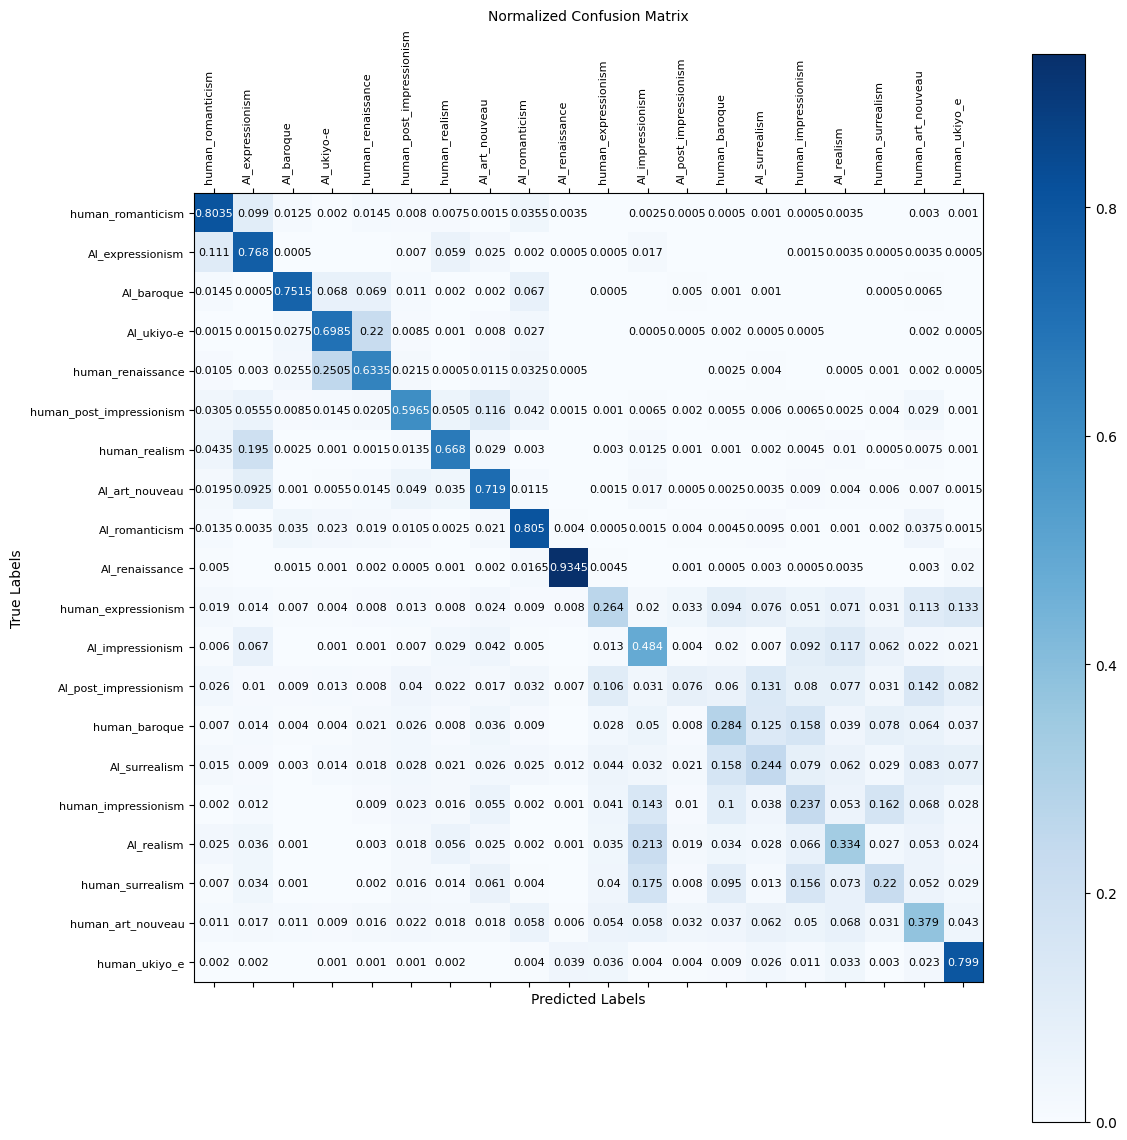


Classification Report:
                          precision    recall  f1-score   support

       human_romanticism       0.72      0.80      0.76      2000
        AI_expressionism       0.58      0.77      0.66      2000
              AI_baroque       0.85      0.75      0.80      2000
              AI_ukiyo-e       0.64      0.70      0.67      2000
       human_renaissance       0.61      0.63      0.62      2000
human_post_impressionism       0.72      0.60      0.65      2000
           human_realism       0.72      0.67      0.69      2000
          AI_art_nouveau       0.66      0.72      0.69      2000
          AI_romanticism       0.72      0.81      0.76      2000
          AI_renaissance       0.95      0.93      0.94      2000
     human_expressionism       0.39      0.26      0.31      1000
        AI_impressionism       0.37      0.48      0.42      1000
   AI_post_impressionism       0.31      0.08      0.12      1000
           human_baroque       0.31      0.28      

In [14]:
# Analyze test results
metrics = analyze_test_results(
    test_loss=test_loss,
    test_accuracy=test_accuracy,
    test_per_class_accuracy=test_per_class_accuracy,
    all_labels=all_labels,
    all_predictions=all_predictions,
    classes=test_classes
)